To reproduce:

1. Ensure that the following dataset directories are present:
   - `CL4R1T4S` - https://github.com/elder-plinius/CL4R1T4S
   - `awesome-ai-system-prompts`- https://github.com/dontriskit/awesome-ai-system-prompts
   - `system_prompts_leaks` - https://github.com/asgeirtj/system_prompts_leaks
   - `system-prompts-and-models-of-ai-tools` - https://github.com/x1xhlol/system-prompts-and-models-of-ai-tools
   - `grok-prompts` - https://github.com/xai-org/grok-prompts

2. If nedeed rename subdirectories to match the unified structure, e.g. change `Claude` to `ANTHROPIC`. Expected subdirectories names: `ANTHROPIC`, `GOOGLE`, `XAI`, `OPENAI`, `META`.

3. Install the requirements:
   ```
   pip install bert_score, pandas, seaborn, matplotlib, cdifflib
   ```


# CL4R1T4S - DATASET RELIABILITY VALIDATION


In [22]:
TEMPLATE = {    
    'dataset': {
        'ANTHROPIC': {
            'Claude 3': { },
            'Claude Sonnet 4': { },
            'Claude Sonnet 3.5': { },
            'Claude Sonnet 3.7': { },
            'Claude Sonnet 4.5': { },
            'Claude Opus 4.1': { },
            'Claude Opus 4.5': { },
            'User Style': { }
        },
        'GOOGLE': {
            'Gemini Diffusion': { },
            'Gemini Gmail Assistant': { },
            'Gemini 2.5 Pro': { },
            'Gemini 2.0': { }
        },
        'XAI': {
            'Grok 2': { },
            'Grok 4': { },
            'Grok 4.1':{ },
            'Grok 3': { }
        },
        'OPENAI': {
            'Atlas': { },
            'ChatGPT 4.1': { },
            'ChatGPT 4o': { },
            'ChatGPT o3': { },
            'ChatGPT o4 mini': { },
            'ChatGPT 5': { },
            'ChatGPT 4.5': { }
        },
        'META': {
            'Llama4': { }
        }
    }
}

In [23]:
from bert_score import BERTScorer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
import json


## Datasets Mappings (model -> file)


In [24]:
CANDIDATE_DATASET = 'CL4R1T4S'

PROMPTS = {
    'CL4R1T4S': {
        'ANTHROPIC': {
            'Claude 3': { },
            'Claude Sonnet 4': { '/ANTHROPIC/Claude_4.txt' },
            'Claude Sonnet 3.5': { '/ANTHROPIC/Claude_Sonnet_3.5.md' },
            'Claude Sonnet 3.7': { '/ANTHROPIC/Claude_Sonnet_3.7_New.txt' },
            'Claude Sonnet 4.5': { '/ANTHROPIC/Claude_Sonnet-4.5_Sep-29-2025.txt' },
            'Claude Opus 4.1': { '/ANTHROPIC/Claude-4.1.txt' },
            'Claude Opus 4.5': { '/ANTHROPIC/Claude-4.5-Opus.txt' },
            'User Style': { '/ANTHROPIC/UserStyle_Modes.md' }
        },
        'GOOGLE': {
            'Gemini Diffusion': { '/GOOGLE/Gemini_Diffusion.md' },
            'Gemini Gmail Assistant': { '/GOOGLE/Gemini_Gmail_Assistant.txt' },
            'Gemini 2.5 Pro': { '/GOOGLE/Gemini-2.5-Pro-04-18-2025.md' },
            'Gemini 2.0': { }
        },
        'XAI': {
            'Grok 2': { },
            'Grok 4': { '/XAI/GROK-4-NEW_Jul-13-2025', '/XAI/Grok4-July-10-2025.md' },
            'Grok 4.1':{ '/XAI/GROK-4.1_Nov-17-2025.txt' },
            'Grok 3': { '/XAI/Grok3.md', '/XAI/Grok3_updated_07-08-2025.md' }
        },
        'OPENAI': {
            'Atlas': { '/OPENAI/Atlas_10-21-25.txt' },
            'ChatGPT 4.1': { '/OPENAI/ChatGPT_4.1_05-15-2025.txt' },
            'ChatGPT 4o': { '/OPENAI/ChatGPT_4o_04-25-2025.txt', '/OPENAI/ChatGPT-4o_Sep-27-25.txt' },
            'ChatGPT o3': { },
            'ChatGPT o4 mini': { '/OPENAI/ChatGPT_o3_o4-mini_04-16-2025' },
            'ChatGPT 5': { '/OPENAI/ChatGPT5-08-07-2025.mkd' },
            'ChatGPT 4.5': { '/OPENAI/GPT-4.5_02-27-25.md' }
        },
        'META': {
            'Llama4': { '/META/Llama4_WhatsApp.txt' }
        }
    },
    'awesome-ai-system-prompts': {
        'ANTHROPIC': {
            'Claude 3': { '/Claude/Claude-2025-05-06.txt' },
            'Claude Sonnet 4': { },
            'Claude Sonnet 3.5': { },
            'Claude Sonnet 3.7': { '/Claude/Claude-Sonnet-3.7.txt' },
            'Claude Sonnet 4.5': { },
            'Claude Opus 4.1': { },
            'Claude Opus 4.5': { },
            'User Style': { }
        },
        'GOOGLE': {
            'Gemini Diffusion': { '/Google/GoogleDiffusion.md' },
            'Gemini Gmail Assistant': { },
            'Gemini 2.5 Pro': { },
            'Gemini 2.0': { }
        },
        'XAI': {
            'Grok 2': { '/Grok/Grok2.md' },
            'Grok 4': { },
            'Grok 4.1':{ },
            'Grok 3': { '/Grok/Grok3.md', '/Grok/grok3_official0330_p1.j2', '/Grok/default_deepsearch_final_summarizer_prompt.j2'} #, '/Grok/Grok3withDeepSearch.md' }
        },
        'OPENAI': {
            'Atlas': { },
            'ChatGPT 4.1': { },
            'ChatGPT 4o': { '/ChatGPT/4o.md' },
            'ChatGPT o3': { },
            'ChatGPT o4 mini': { '/ChatGPT/system-2025-04-16.md' },
            'ChatGPT 5': { '/ChatGPT/GPT-5.md', '/ChatGPT/5.md' },
            'ChatGPT 4.5': { '/ChatGPT/4-5.md' }
        },
        'META': {
            'Llama4': { '/MetaAI-Whatsapp/Llama4.txt', '/MetaAI-Whatsapp/WhatsApp-Llama4-Jul-19-2025.md' }
        }
    },
    'system_prompts_leaks': {
        'ANTHROPIC': {
            'Claude 3': { '/Anthropic/claude.txt'  },
            'Claude Sonnet 4': { '/claude.txt', '/Anthropic/claude-sonnet-4.md', '/Anthropic/claude-sonnet-4.txt' },
            'Claude Sonnet 3.5': { },
            'Claude Sonnet 3.7': { '/Anthropic/claude-3.7-sonnet-full-system-message-humanreadable.md', '/Anthropic/claude-3.7-sonnet-w-tools.md', '/Anthropic/claude-3.7-sonnet-w-tools.xml' },
            'Claude Sonnet 4.5': { '/Anthropic/claude-4.5-sonnet-learning-style', '/Anthropic/claude-4.5-sonnet.md' },
            'Claude Opus 4.1': { '/Anthropic/claude-4.1-opus-thinking.md' },
            'Claude Opus 4.5': { '/Anthropic/claude-opus-4.5' },
            'User Style': { }
        },
        'GOOGLE': {
            'Gemini Diffusion': { '/Google/gemini-diffusion.md' },
            'Gemini Gmail Assistant': { },
            'Gemini 2.5 Pro': { '/Google/gemini-2.5-pro-webapp.md' },
            'Gemini 2.0': { '/Google/gemini-2.0-flash-webapp.md' }
        },
        'XAI': {
            'Grok 2': { },
            'Grok 4': { },
            'Grok 4.1': { },
            'Grok 3': { }
        },
        'OPENAI': {
            'Atlas': { '/OpenAI/chatgpt-atlas.md'},
            'ChatGPT 4.1': { '/OpenAI/GPT-4.1.md' },
            'ChatGPT 4o': { '/OpenAI/4o-2025-09-03-new-personality.md', '/OpenAI/GPT-4o.md' },
            'ChatGPT o3': { '/OpenAI/o3.md' },
            'ChatGPT o4 mini': { '/OpenAI/o4-mini-high.md', '/OpenAI/o4-mini.md', '/OpenAI/GPT-4.1-mini.md' },
            'ChatGPT 5': { '/OpenAI/ChatGPT-GPT-5-Agent-mode-System-Prompt.md', '/OpenAI/gpt-5-thinking.md' },
            'ChatGPT 4.5': { '/OpenAI/GPT-4.5.md' }
        },
        'META': {
            'Llama4': { }
        }
    },
    'system-prompts-and-models-of-ai-tools': {
        'ANTHROPIC': {
            'Claude 3': { },
            'Claude Sonnet 4': { },
            'Claude Sonnet 3.5': { },
            'Claude Sonnet 3.7': { },
            'Claude Sonnet 4.5': { '/Anthropic/Sonnet 4.5 Prompt.txt' },
            'Claude Opus 4.1': { },
            'Claude Opus 4.5': { },
            'User Style': { }
        },
        'GOOGLE': {
            'Gemini Diffusion': { },
            'Gemini Gmail Assistant': { },
            'Gemini 2.5 Pro': { },
            'Gemini 2.0': { }
        },
        'XAI': {
            'Grok 2': { },
            'Grok 4': { },
            'Grok 4.1':{ },
            'Grok 3': { }
        },
        'OPENAI': {
            'Atlas': { },
            'ChatGPT 4.1': { },
            'ChatGPT 4o': { },
            'ChatGPT o3': { },
            'ChatGPT o4 mini': { },
            'ChatGPT 5': { },
            'ChatGPT 4.5': { }
        },
        'META': {
            'Llama4': { }
        }
    },
    'grok-prompts': {
        'ANTHROPIC': {
            'Claude 3': { },
            'Claude Sonnet 4': { },
            'Claude Sonnet 3.5': { },
            'Claude Sonnet 3.7': { },
            'Claude Sonnet 4.5': { },
            'Claude Opus 4.1': { },
            'Claude Opus 4.5': { },
            'User Style': { }
        },
        'GOOGLE': {
            'Gemini Diffusion': { },
            'Gemini Gmail Assistant': { },
            'Gemini 2.5 Pro': { },
            'Gemini 2.0': { }
        },
        'XAI': {
            'Grok 2': { },
            'Grok 4': { },
            'Grok 4.1':{ '/grok4p1_non_thinking_no_tool_system_turn_prompt.j2', '/grok4p1_non_thinking_system_turn_prompt.j2', '/grok4p1_thinking_system_turn_prompt_v2.j2'  },
            'Grok 3': { '/grok3_official0330_p1.j2' }
        },
        'OPENAI': {
            'Atlas': { },
            'ChatGPT 4.1': { },
            'ChatGPT 4o': { },
            'ChatGPT o3': { },
            'ChatGPT o4 mini': { },
            'ChatGPT 5': { },
            'ChatGPT 4.5': { }
        },
        'META': {
            'Llama4': { }
        }
    },
}

CANDIDATE_PROMPTS = {key: value for key, value in PROMPTS.items() if key == CANDIDATE_DATASET}
REFERENCE_PROMPTS = {key: value for key, value in PROMPTS.items() if key != CANDIDATE_DATASET}

## CL4R1T4S VALIDATION AGAINTS OTHER DATASETS


In [ ]:
def read_prompt(dataset, model):
    file_path = f"{dataset}{model}"
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        text = ''.join(lines)
    return text, lines

def lines_similarity(candidate_lines, reference_lines):
    total_lines = max(len(candidate_lines), len(reference_lines))
    matching_lines = sum(1 for l1, l2 in zip(candidate_lines, reference_lines) if l1 == l2)
    return matching_lines / total_lines if total_lines > 0 else 1.0

def words_similarity(candidate_text, reference_text):
    words1 = candidate_text.split()
    words2 = reference_text.split()
    return SequenceMatcher(None, words1, words2).ratio()

def compare_prompts(candidate_dataset, candidate_model, reference_dataset, reference_model):
    candidate_text, candidate_lines = read_prompt(candidate_dataset, candidate_model)
    reference_text, reference_lines = read_prompt(reference_dataset, reference_model)
    
    scorer = BERTScorer(model_type='bert-base-uncased')
    precision, recall, f1 = scorer.score([candidate_text], [reference_text])

    similarity = SequenceMatcher(None, candidate_text, reference_text).ratio()
    lines_sim = lines_similarity(candidate_lines, reference_lines)
    words_sim = words_similarity(candidate_text, reference_text)
    char_diff = abs(len(candidate_text) - len(reference_text))

    return precision, recall, f1, similarity, lines_sim, words_sim, char_diff

def plot_aggregated_heatmap(results, measure='Precision', agg_func='mean'):
    df = pd.DataFrame(results)
    df['Candidate Prompt'] = df['Provider'] + ' - ' + df['Model']
    
    pivot_table = df.pivot_table(
        columns='Reference Dataset',
        index='Candidate Prompt',
        values=measure, 
        aggfunc=agg_func
    )
    
    plt.figure(figsize=(12, 16))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)
    plt.title(f'{measure} Scores Matrix (Aggregated by {agg_func.capitalize()})')S
    plt.xlabel('Reference Dataset')
    plt.ylabel('Candidate Prompt')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [26]:
results = []
for dataset in CANDIDATE_PROMPTS.keys():
    for provider in CANDIDATE_PROMPTS[dataset].keys():
        for model in CANDIDATE_PROMPTS[dataset][provider].keys():
            candidate_files = CANDIDATE_PROMPTS[dataset][provider][model]

            for ref_dataset in REFERENCE_PROMPTS.keys():
                reference_files = REFERENCE_PROMPTS.get(ref_dataset, {}).get(provider, {}).get(model, set())
                for candidate_file in candidate_files:
                    for reference_file in reference_files:
                        try:
                            precision, recall, f1, similarity, lines_sim, words_sim, char_diff = compare_prompts(dataset, candidate_file, ref_dataset, reference_file)
                            results.append({
                                'Provider': provider,
                                'Model': model,
                                'Candidate': f"{dataset}{candidate_file}",
                                'Reference': f"{ref_dataset}{reference_file}",
                                'Reference Dataset': ref_dataset,
                                'Precision': precision.item(),
                                'Recall': recall.item(),
                                'F1': f1.item(),
                                'Similarity': similarity,
                                'Lines Similarity': lines_sim,
                                'Words Similarity': words_sim,
                                'Char Difference': char_diff
                            })
                        except Exception as e:
                            print(f"Skipping due to error: {e}")

aggregation_method = 'mean' # 'max' # 'min'

### Bert Score - Precision


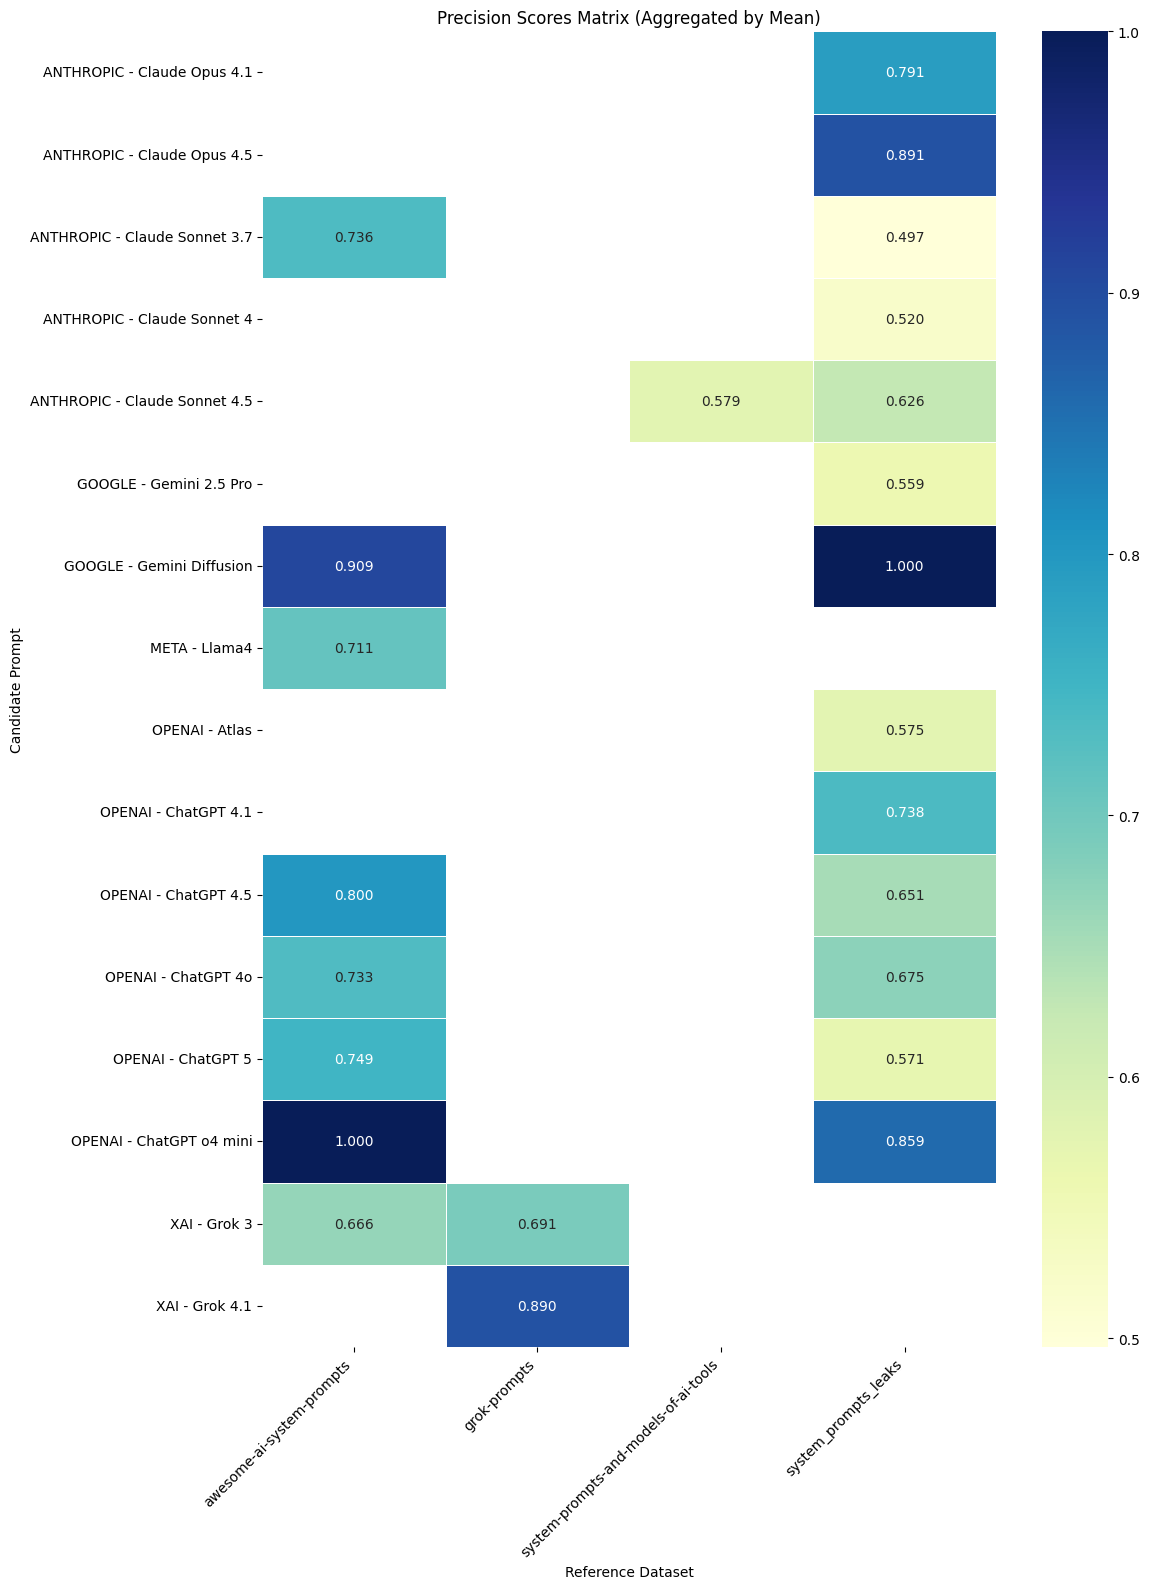

In [27]:
plot_aggregated_heatmap(results, 'Precision', aggregation_method)

### Bert Score - Recall


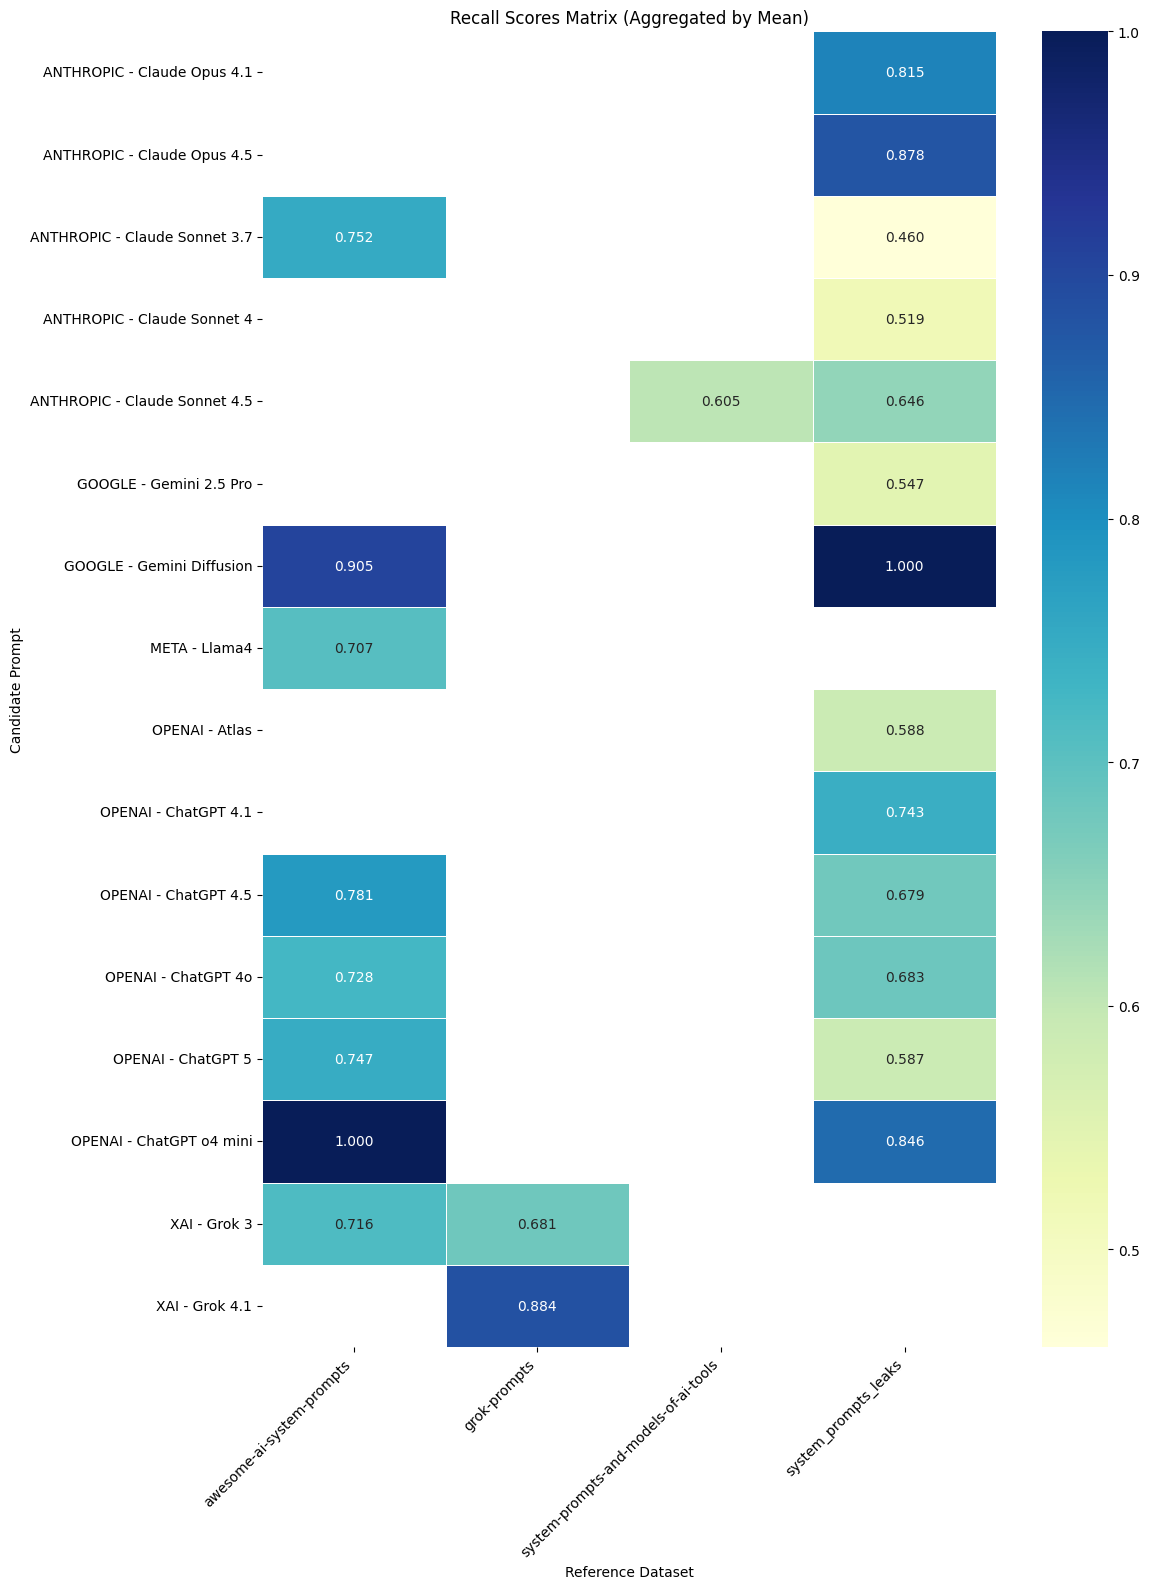

In [28]:
plot_aggregated_heatmap(results, 'Recall', aggregation_method)

### Bert Score - F1


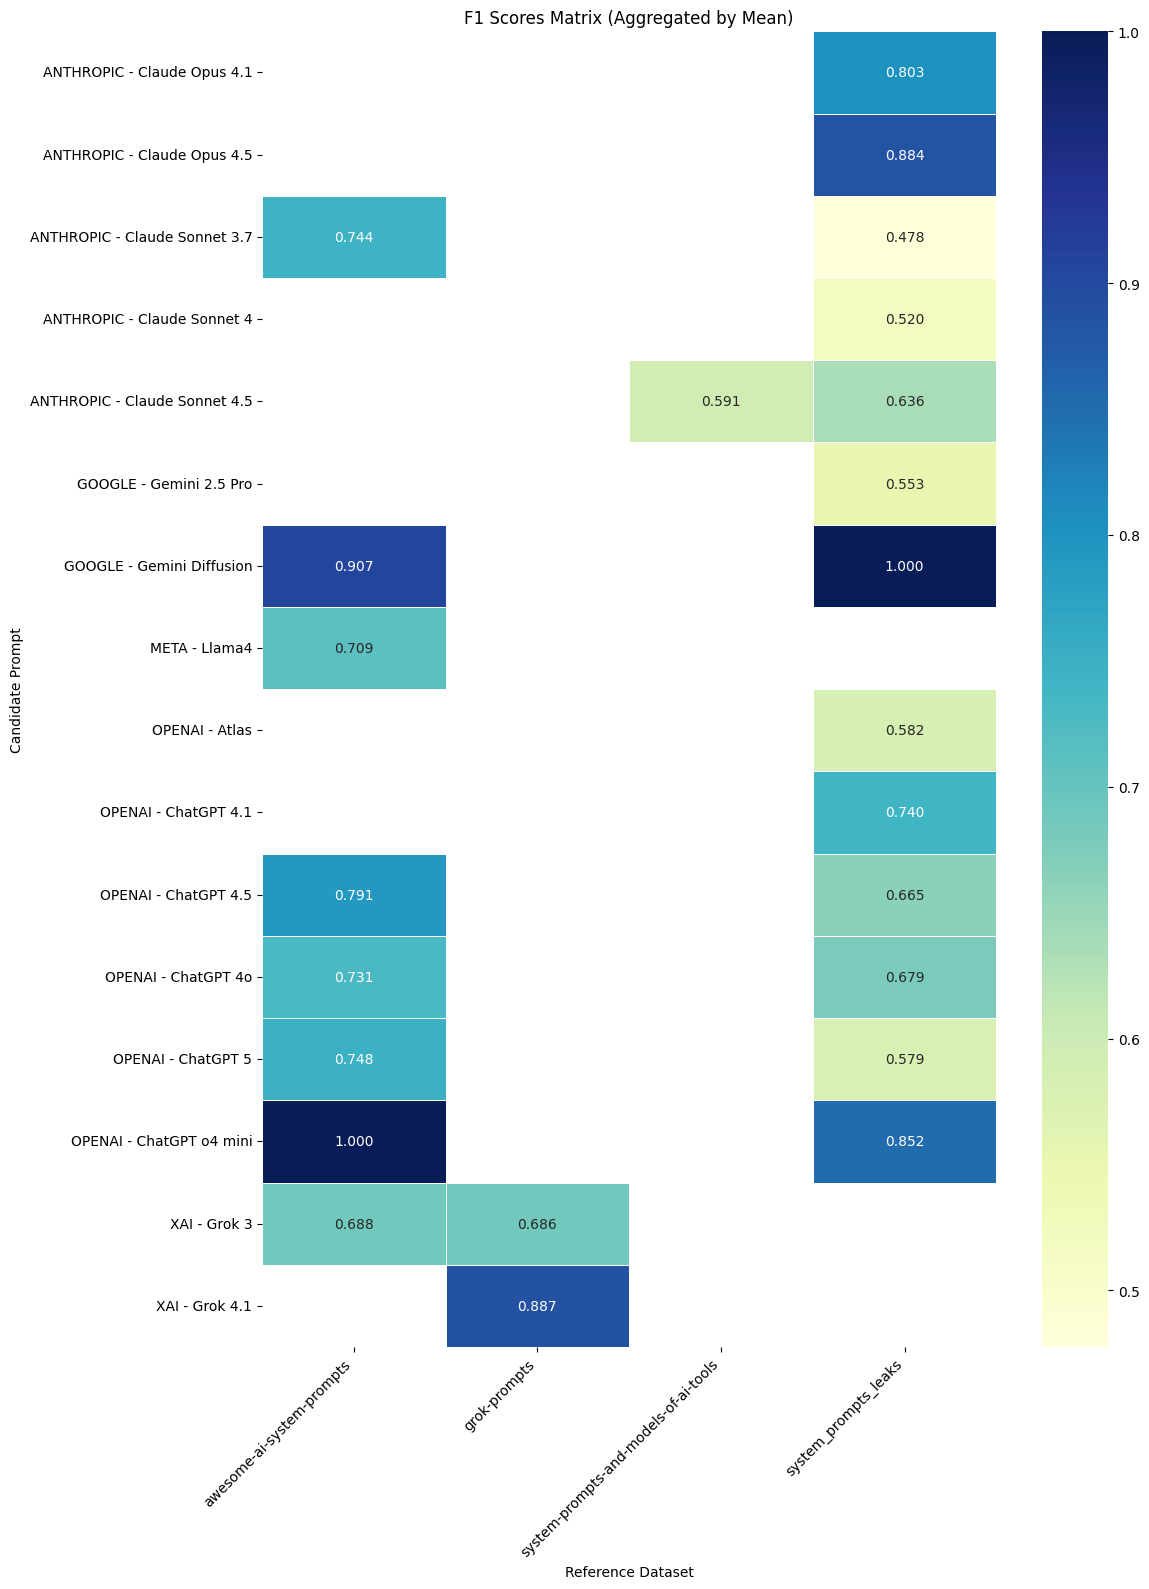

In [29]:
plot_aggregated_heatmap(results, 'F1', aggregation_method)

### Similarity (SequenceMatcher)


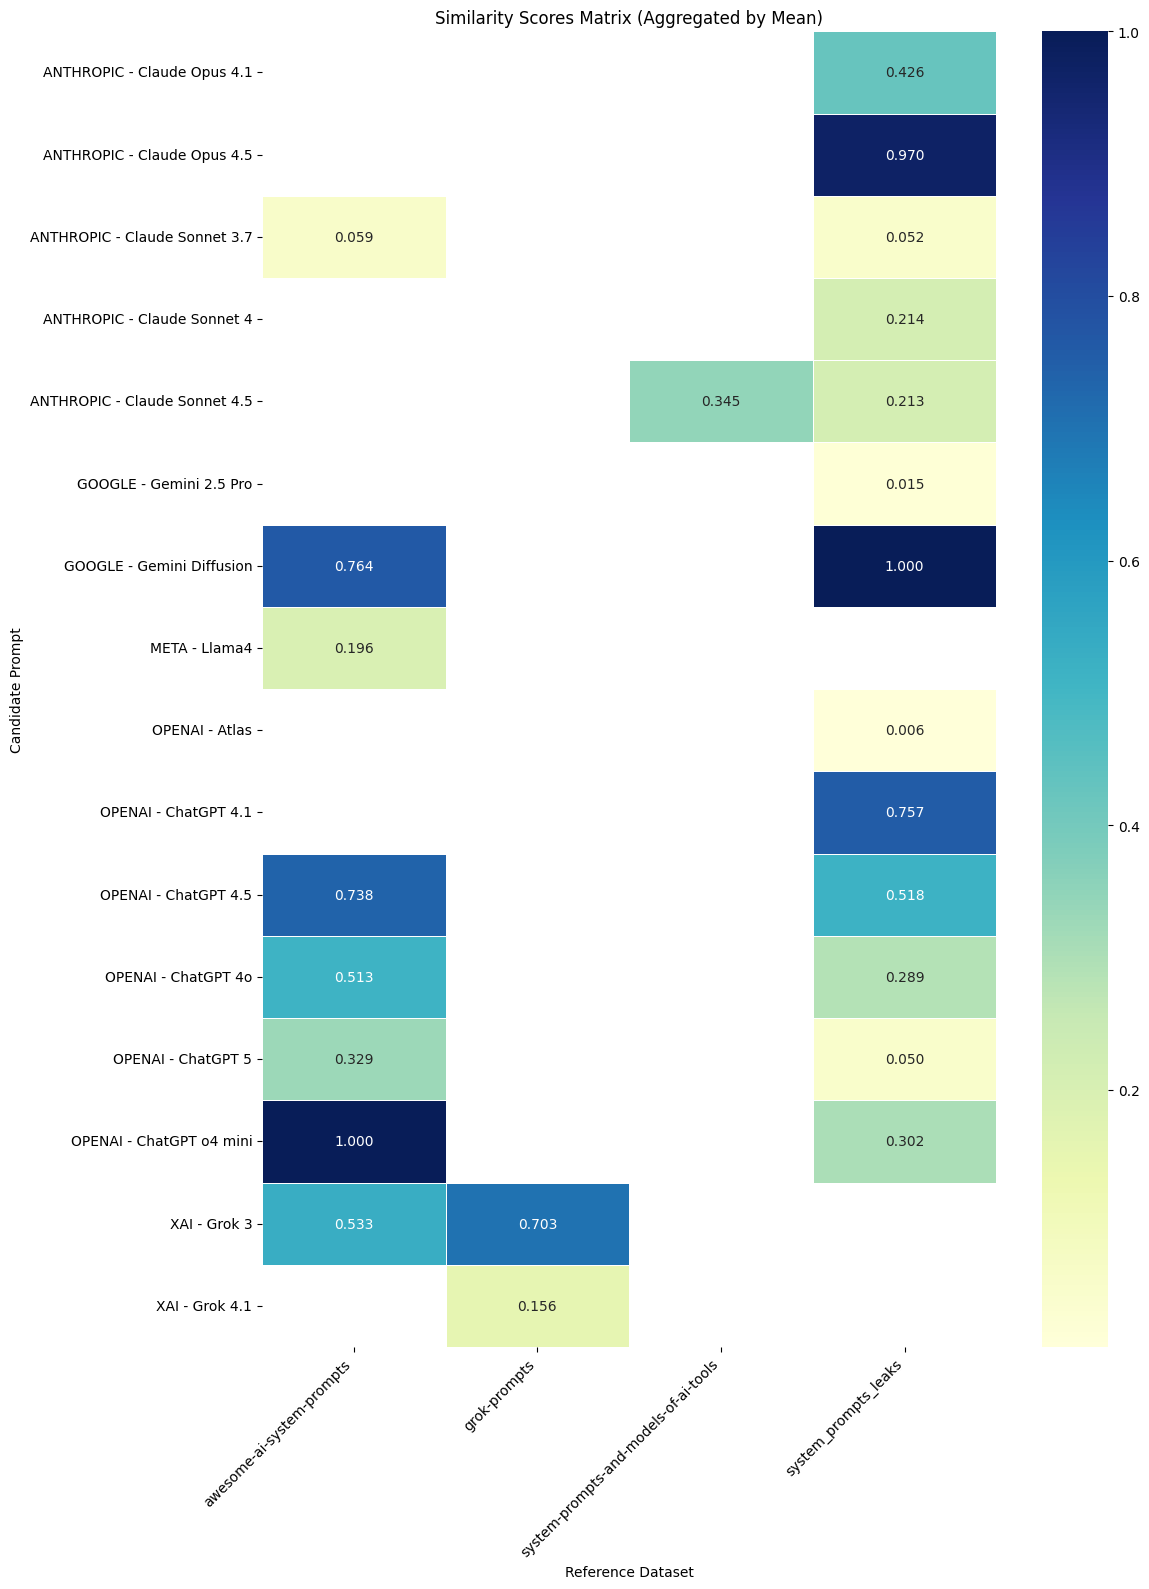

In [30]:
plot_aggregated_heatmap(results, 'Similarity', aggregation_method)

### Lines Similarity (fraction of matching lines)


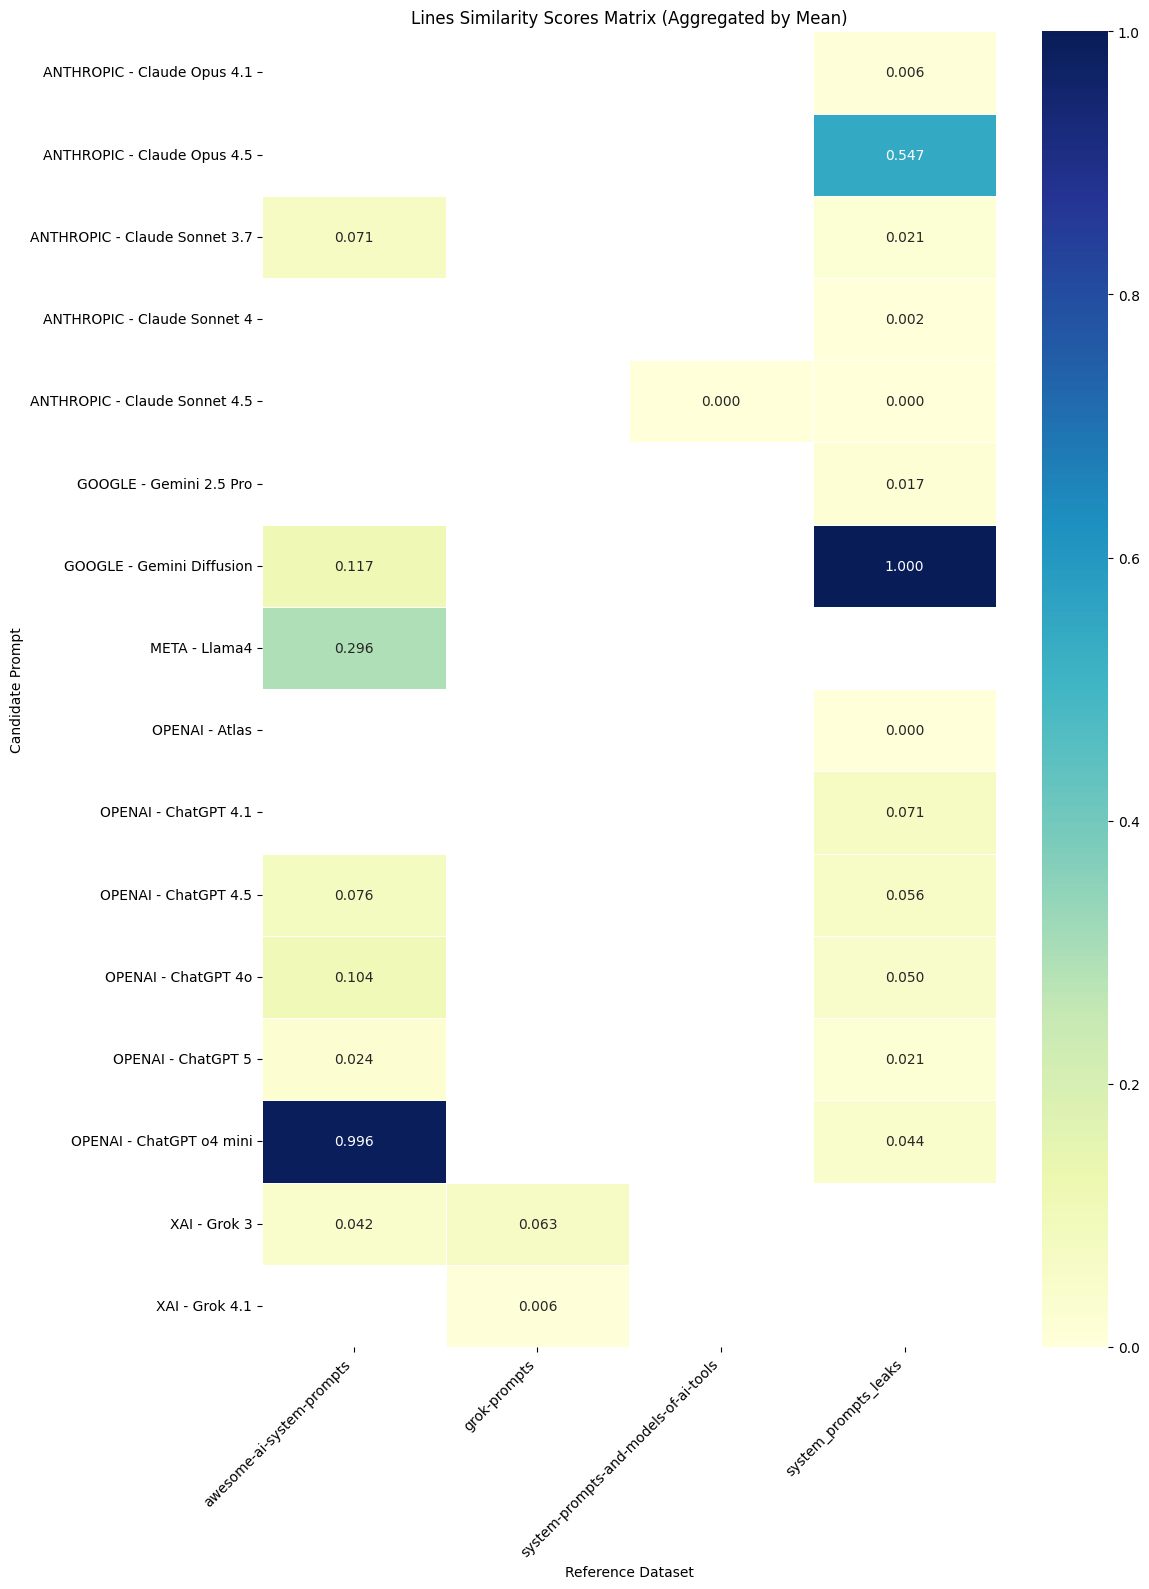

In [31]:
plot_aggregated_heatmap(results, 'Lines Similarity', aggregation_method)

### Words Similarity (SequenceMatcher)


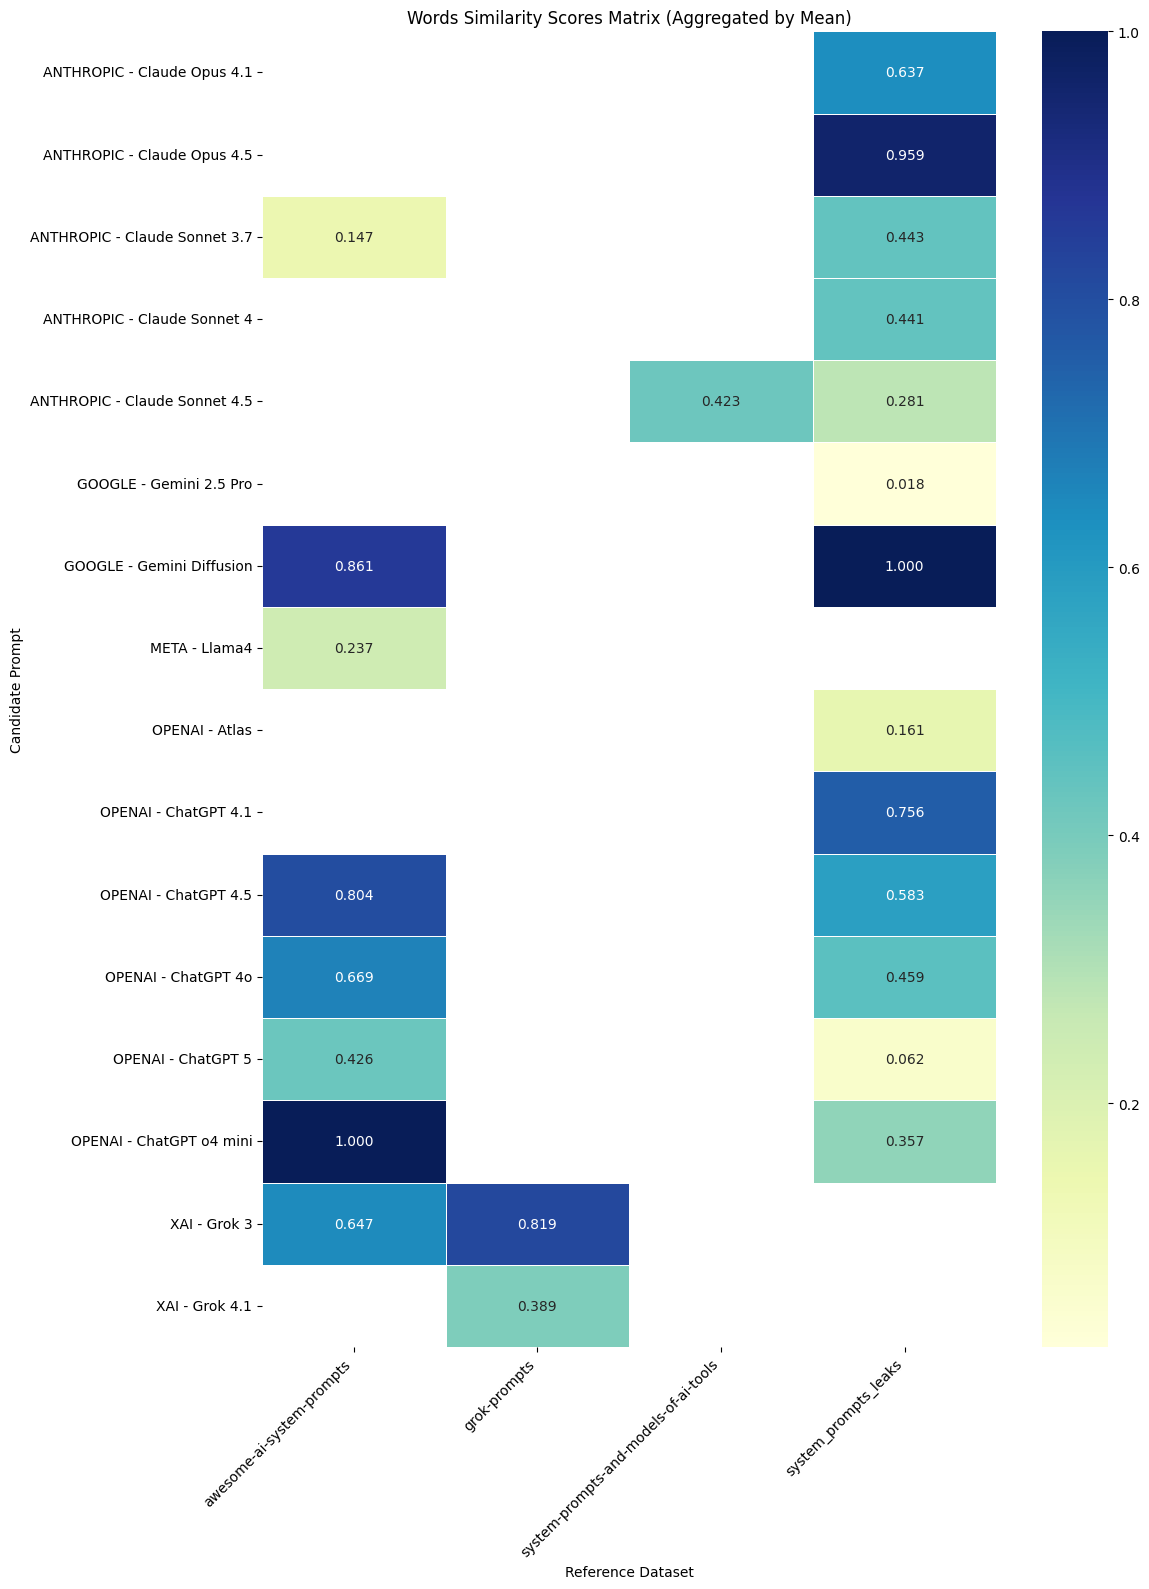

In [32]:
plot_aggregated_heatmap(results, 'Words Similarity', aggregation_method)

### Size Difference


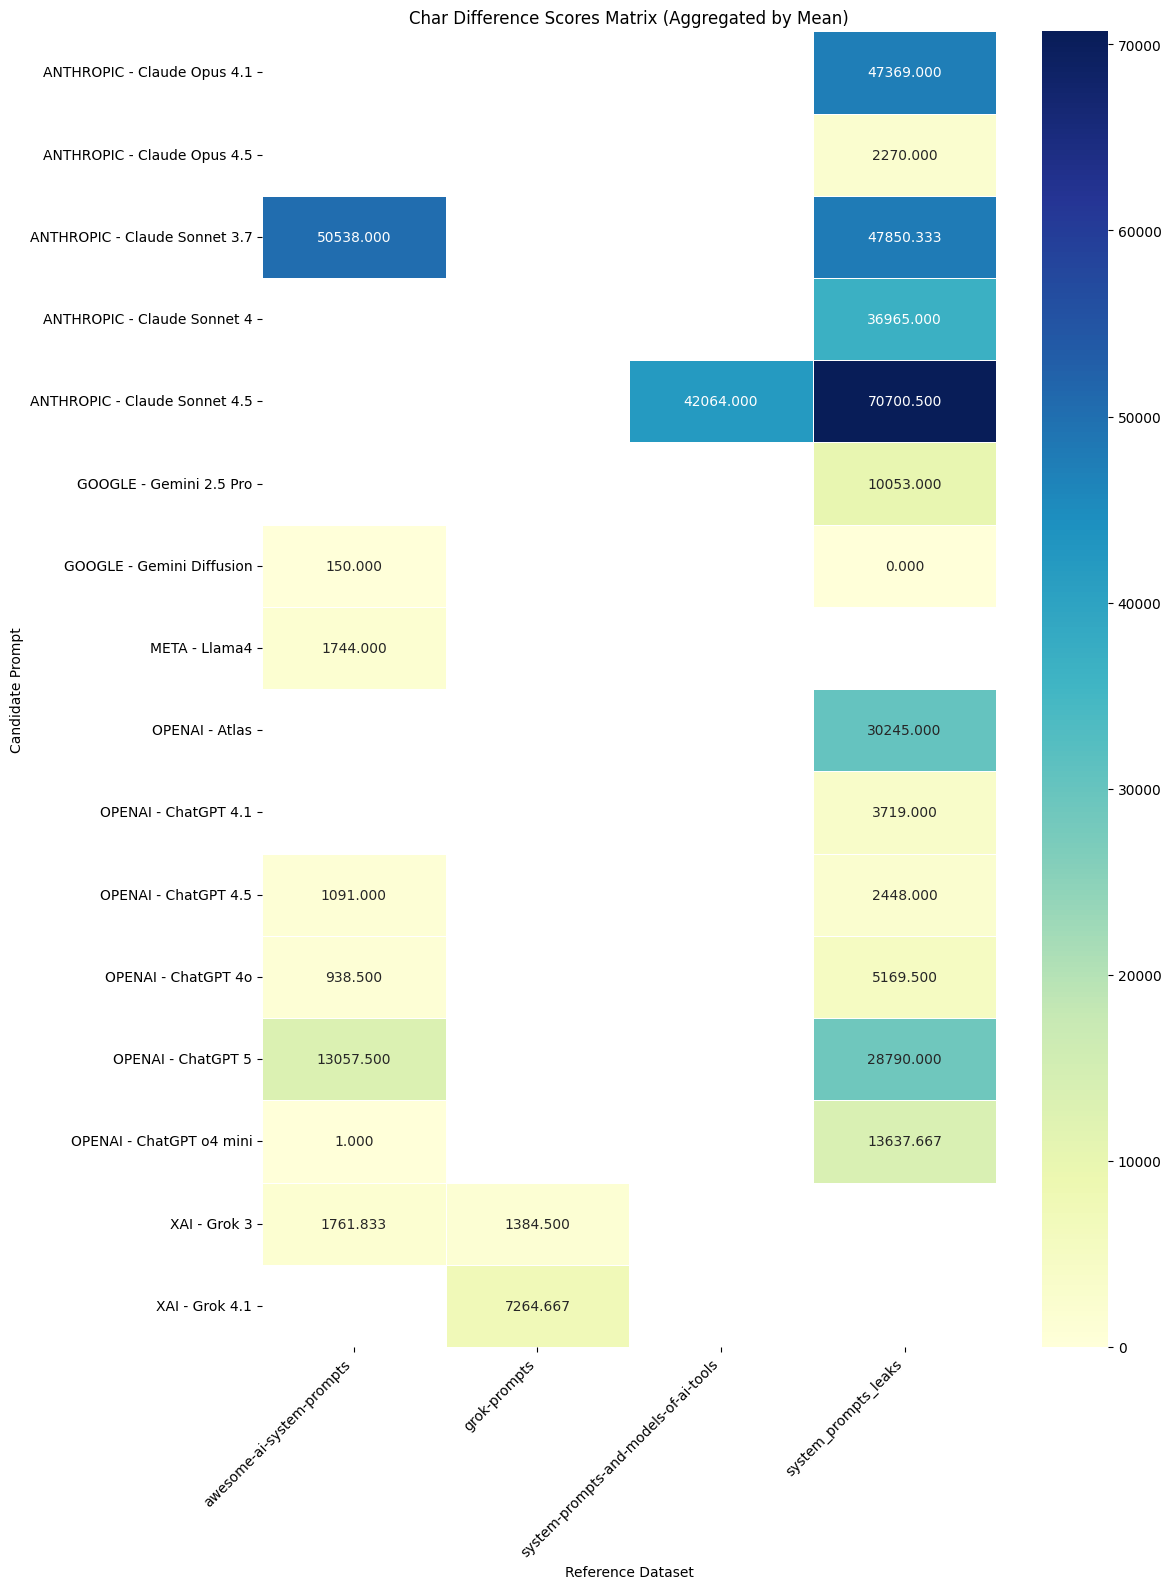

In [33]:
plot_aggregated_heatmap(results, 'Char Difference', aggregation_method)

## Most Reliable Prompts

If there is more than one candidate prompt corresponding to a given model, we should choose the more reliable one.


In [34]:
def create_most_reliable_prompts(results, metric='Precision'):
    df = pd.DataFrame(results) if results else pd.DataFrame()

    best_from_results = {}
    if not df.empty:
        avg_scores = df.groupby(['Provider', 'Model', 'Candidate'])[metric].mean().reset_index()
        best_candidates_idx = avg_scores.groupby(['Provider', 'Model'])[metric].idxmax()
        best_candidates_df = avg_scores.loc[best_candidates_idx]
        for _, row in best_candidates_df.iterrows():
            if row['Provider'] not in best_from_results:
                best_from_results[row['Provider']] = {}
            best_from_results[row['Provider']][row['Model']] = row['Candidate'].replace(CANDIDATE_DATASET, '')

    most_reliable = {CANDIDATE_DATASET: {}}
    for provider, models in CANDIDATE_PROMPTS[CANDIDATE_DATASET].items():
        if provider not in most_reliable[CANDIDATE_DATASET]:
            most_reliable[CANDIDATE_DATASET][provider] = {}
        
        for model, files in models.items():
            if not files:
                # most_reliable[CANDIDATE_DATASET][provider][model] = []
                continue

            # If we have a winner from the comparison, use it
            if provider in best_from_results and model in best_from_results[provider]:
                chosen_file = best_from_results[provider][model]
            else:
                # Fallback for models with no comparison results - we just pick the first
                chosen_file = list(files)[0]
            
            most_reliable[CANDIDATE_DATASET][provider][model] = [chosen_file]
            
    return most_reliable

In [35]:
MOST_RELIABLE = create_most_reliable_prompts(results)
print(json.dumps(MOST_RELIABLE, indent=4))

{
    "CL4R1T4S": {
        "ANTHROPIC": {
            "Claude Sonnet 4": [
                "/ANTHROPIC/Claude_4.txt"
            ],
            "Claude Sonnet 3.5": [
                "/ANTHROPIC/Claude_Sonnet_3.5.md"
            ],
            "Claude Sonnet 3.7": [
                "/ANTHROPIC/Claude_Sonnet_3.7_New.txt"
            ],
            "Claude Sonnet 4.5": [
                "/ANTHROPIC/Claude_Sonnet-4.5_Sep-29-2025.txt"
            ],
            "Claude Opus 4.1": [
                "/ANTHROPIC/Claude-4.1.txt"
            ],
            "Claude Opus 4.5": [
                "/ANTHROPIC/Claude-4.5-Opus.txt"
            ],
            "User Style": [
                "/ANTHROPIC/UserStyle_Modes.md"
            ]
        },
        "GOOGLE": {
            "Gemini Diffusion": [
                "/GOOGLE/Gemini_Diffusion.md"
            ],
            "Gemini Gmail Assistant": [
                "/GOOGLE/Gemini_Gmail_Assistant.txt"
            ],
            "Gemini 2.5 Pro": [
    